In [1]:
import os
import glob
import sys
import re

import numpy as np
import pandas as pd
from scipy.misc import derivative
import scipy.integrate as intg
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant, RandomNormal

from sklearn.metrics import mean_squared_error
from astroNN.nn.layers import MCDropout

np.random.seed(0)
%matplotlib inline

In [2]:
dir_name = '/home/isidro/Documents/github/model_independent_RC/data/MassModels/'
path = r'{}*.NFW.fix.REV.dat'.format(dir_name)
files = glob.glob(path)
print(files)

['/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2903.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3521.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC5055.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2841.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC7331.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC6946.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2366.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC925.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3621.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2403.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/Mas

In [3]:
for i, file in enumerate(files):
    print(i, file)

0 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2903.NFW.fix.REV.dat
1 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3521.NFW.fix.REV.dat
2 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC5055.NFW.fix.REV.dat
3 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2841.NFW.fix.REV.dat
4 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC7331.NFW.fix.REV.dat
5 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC6946.NFW.fix.REV.dat
6 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2366.NFW.fix.REV.dat
7 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC925.NFW.fix.REV.dat
8 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3621.NFW.fix.REV.dat
9 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2403.NFW.fix.REV.dat
10 /home/isidro/Documents/github/model_independent_RC/data/MassModels/N

In [4]:
def root_name(file):
    print(file)
#     print("dir name", dir_name)
    s1 = re.sub(dir_name, '', file)
    print("without dir", s1)
    s = s1.rstrip('.NFW.fix.REV.dat')
    print("root", s)
    return s

In [5]:
root_name(files[11])

/home/isidro/Documents/github/model_independent_RC/data/MassModels/DDO154.NFW.fix.REV.dat
without dir DDO154.NFW.fix.REV.dat
root DDO154


'DDO154'

Model 1/17
----------
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2903.NFW.fix.REV.dat
without dir NGC2903.NFW.fix.REV.dat
root NGC2903
X_train shape: (69, 1) | y_train shape: (69, 2) | x_val shape: (18, 1) | y_val shape: (18, 2)
16/16 [==============================] - 0s 2ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2903.NFW.fix.REV.dat
without dir NGC2903.NFW.fix.REV.dat
root NGC2903
----------
Model 2/17
----------
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3521.NFW.fix.REV.dat
without dir NGC3521.NFW.fix.REV.dat
root NGC3521
X_train shape: (80, 1) | y_train shape: (80, 2) | x_val shape: (20, 1) | y_val shape: (20, 2)
16/16 [==============================] - 0s 1ms/step


16/16 [==============================] - 0s 1ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3521.NFW.fix.REV.dat
without dir NGC3521.NFW.fix.REV.dat
root NGC3521
----------
Model 3/17
----------
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC5055.NFW.fix.REV.dat
without dir NGC5055.NFW.fix.REV.dat
root NGC5055
X_train shape: (159, 1) | y_train shape: (159, 2) | x_val shape: (40, 1) | y_val shape: (40, 2)
16/16 [==============================] - 0s 1ms/step


16/16 [==============================] - 0s 1ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC5055.NFW.fix.REV.dat
without dir NGC5055.NFW.fix.REV.dat
root NGC5055
----------
Model 4/17
----------
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2841.NFW.fix.REV.dat
without dir NGC2841.NFW.fix.REV.dat
root NGC2841
X_train shape: (112, 1) | y_train shape: (112, 2) | x_val shape: (29, 1) | y_val shape: (29, 2)
16/16 [==============================] - 0s 1ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2841.NFW.fix.REV.dat
without dir NGC2841.NFW.fix.REV.dat
root NGC2841
----------
Model 5/17
----------
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC7331.NFW.fix.REV.dat
without dir NGC7331.NFW.fix.REV.dat
root NGC7331
X_train shape: (84, 1) | y_train shape: (84, 2) | x_val shape: (21, 1) | y_val shape: (21, 2)
16/16 [==============================] - 0s 1ms/step


16/16 [==============================] - 0s 1ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC7331.NFW.fix.REV.dat
without dir NGC7331.NFW.fix.REV.dat
root NGC7331
----------
Model 6/17
----------
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC6946.NFW.fix.REV.dat
without dir NGC6946.NFW.fix.REV.dat
root NGC6946
X_train shape: (165, 1) | y_train shape: (165, 2) | x_val shape: (42, 1) | y_val shape: (42, 2)
16/16 [==============================] - 0s 1ms/step


16/16 [==============================] - 0s 1ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC6946.NFW.fix.REV.dat
without dir NGC6946.NFW.fix.REV.dat
root NGC6946
----------
Model 7/17
----------
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2366.NFW.fix.REV.dat
without dir NGC2366.NFW.fix.REV.dat
root NGC2366
X_train shape: (32, 1) | y_train shape: (32, 2) | x_val shape: (9, 1) | y_val shape: (9, 2)
16/16 [==============================] - 0s 2ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2366.NFW.fix.REV.dat
without dir NGC2366.NFW.fix.REV.dat
root NGC2366
----------
Model 8/17
----------
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC925.NFW.fix.REV.dat
without dir NGC925.NFW.fix.REV.dat
root NGC925
X_train shape: (76, 1) | y_train shape: (76, 2) | x_val shape: (20, 1) | y_val shape: (20, 2)
16/16 [==============================] - 0s 1ms/step


16/16 [==============================] - 0s 2ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC925.NFW.fix.REV.dat
without dir NGC925.NFW.fix.REV.dat
root NGC925
----------
Model 9/17
----------
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3621.NFW.fix.REV.dat
without dir NGC3621.NFW.fix.REV.dat
root NGC3621
X_train shape: (98, 1) | y_train shape: (98, 2) | x_val shape: (25, 1) | y_val shape: (25, 2)
16/16 [==============================] - 0s 1ms/step


16/16 [==============================] - 0s 2ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3621.NFW.fix.REV.dat
without dir NGC3621.NFW.fix.REV.dat
root NGC3621
----------
Model 10/17
----------
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2403.NFW.fix.REV.dat
without dir NGC2403.NFW.fix.REV.dat
root NGC2403
X_train shape: (230, 1) | y_train shape: (230, 2) | x_val shape: (58, 1) | y_val shape: (58, 2)
16/16 [==============================] - 0s 1ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2403.NFW.fix.REV.dat
without dir NGC2403.NFW.fix.REV.dat
root NGC2403
----------
Model 11/17
----------
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3031.NFW.fix.REV.dat
without dir NGC3031.NFW.fix.REV.dat
root NGC3031
X_train shape: (93, 1) | y_train shape: (93, 2) | x_val shape: (24, 1) | y_val shape: (24, 2)


16/16 [==============================] - 0s 1ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3031.NFW.fix.REV.dat
without dir NGC3031.NFW.fix.REV.dat
root NGC3031
----------
Model 12/17
----------
/home/isidro/Documents/github/model_independent_RC/data/MassModels/DDO154.NFW.fix.REV.dat
without dir DDO154.NFW.fix.REV.dat
root DDO154
X_train shape: (48, 1) | y_train shape: (48, 2) | x_val shape: (13, 1) | y_val shape: (13, 2)
16/16 [==============================] - 0s 2ms/step


16/16 [==============================] - 0s 2ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/DDO154.NFW.fix.REV.dat
without dir DDO154.NFW.fix.REV.dat
root DDO154
----------
Model 13/17
----------
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2976.NFW.fix.REV.dat
without dir NGC2976.NFW.fix.REV.dat
root NGC2976
X_train shape: (33, 1) | y_train shape: (33, 2) | x_val shape: (9, 1) | y_val shape: (9, 2)
16/16 [==============================] - 0s 2ms/step


16/16 [==============================] - 0s 2ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2976.NFW.fix.REV.dat
without dir NGC2976.NFW.fix.REV.dat
root NGC2976
----------
Model 14/17
----------
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC4736.NFW.fix.REV.dat
without dir NGC4736.NFW.fix.REV.dat
root NGC4736
X_train shape: (65, 1) | y_train shape: (65, 2) | x_val shape: (17, 1) | y_val shape: (17, 2)
16/16 [==============================] - 0s 2ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC4736.NFW.fix.REV.dat
without dir NGC4736.NFW.fix.REV.dat
root NGC4736
----------
Model 15/17
----------
/home/isidro/Documents/github/model_independent_RC/data/MassModels/IC2574.NFW.fix.REV.dat
without dir IC2574.NFW.fix.REV.dat
root IC2574
X_train shape: (80, 1) | y_train shape: (80, 2) | x_val shape: (20, 1) | y_val shape: (20, 2)
16/16 [==============================] - 0s 2ms/step


16/16 [==============================] - 0s 2ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/IC2574.NFW.fix.REV.dat
without dir IC2574.NFW.fix.REV.dat
root IC2574
----------
Model 16/17
----------
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3198.NFW.fix.REV.dat
without dir NGC3198.NFW.fix.REV.dat
root NGC3198
X_train shape: (75, 1) | y_train shape: (75, 2) | x_val shape: (19, 1) | y_val shape: (19, 2)
16/16 [==============================] - 0s 2ms/step


16/16 [==============================] - 0s 1ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3198.NFW.fix.REV.dat
without dir NGC3198.NFW.fix.REV.dat
root NGC3198
----------
Model 17/17
----------
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC7793.NFW.fix.REV.dat
without dir NGC7793.NFW.fix.REV.dat
root NGC7793
X_train shape: (54, 1) | y_train shape: (54, 2) | x_val shape: (14, 1) | y_val shape: (14, 2)
16/16 [==============================] - 0s 2ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC7793.NFW.fix.REV.dat
without dir NGC7793.NFW.fix.REV.dat
root NGC7793
----------


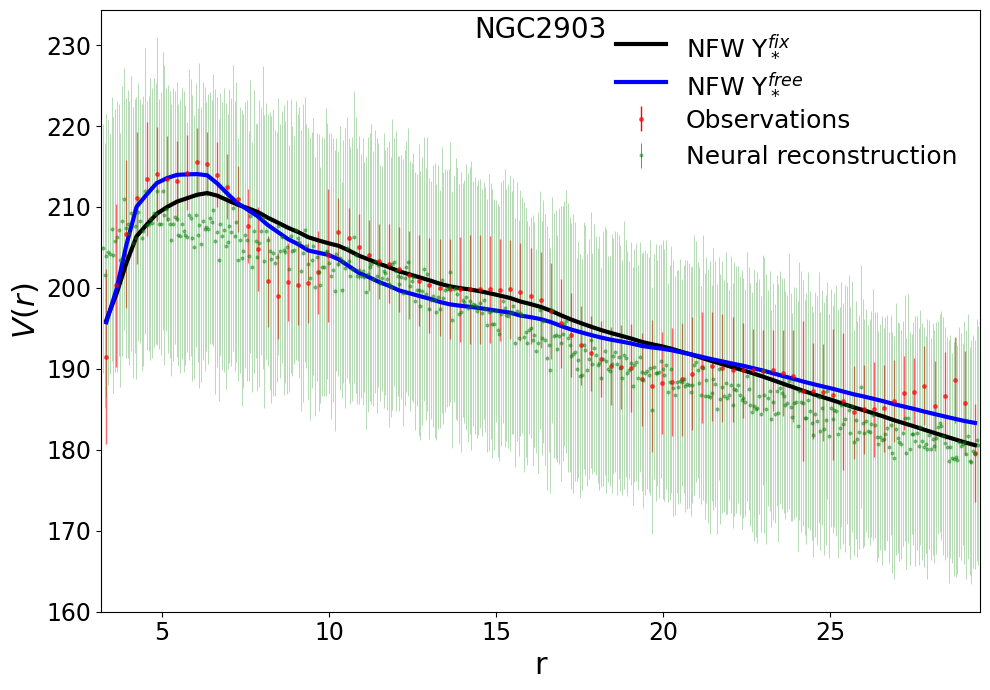

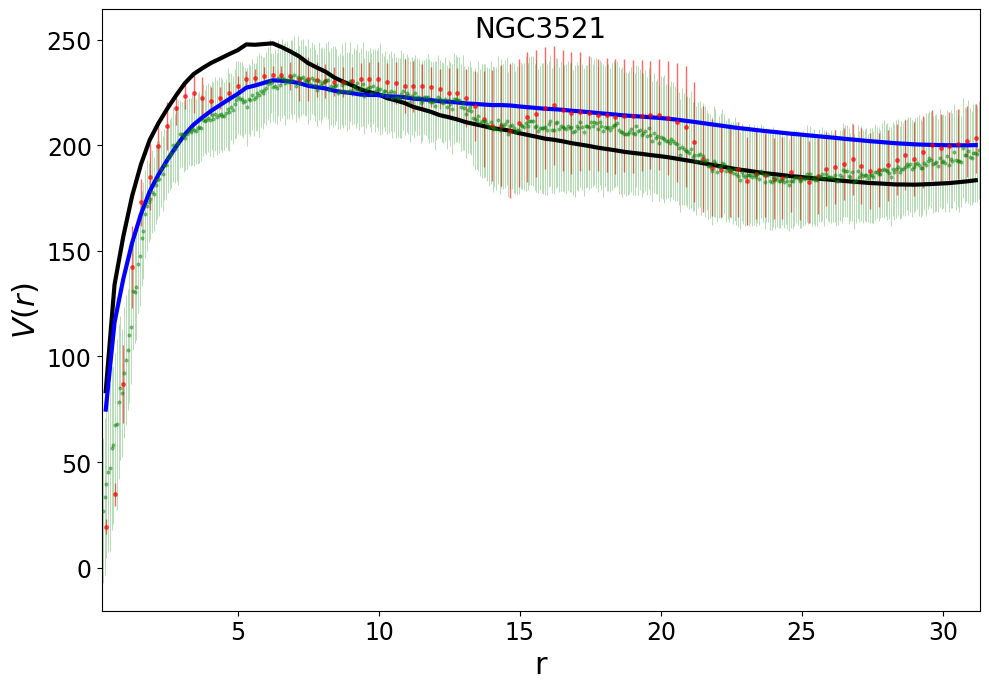

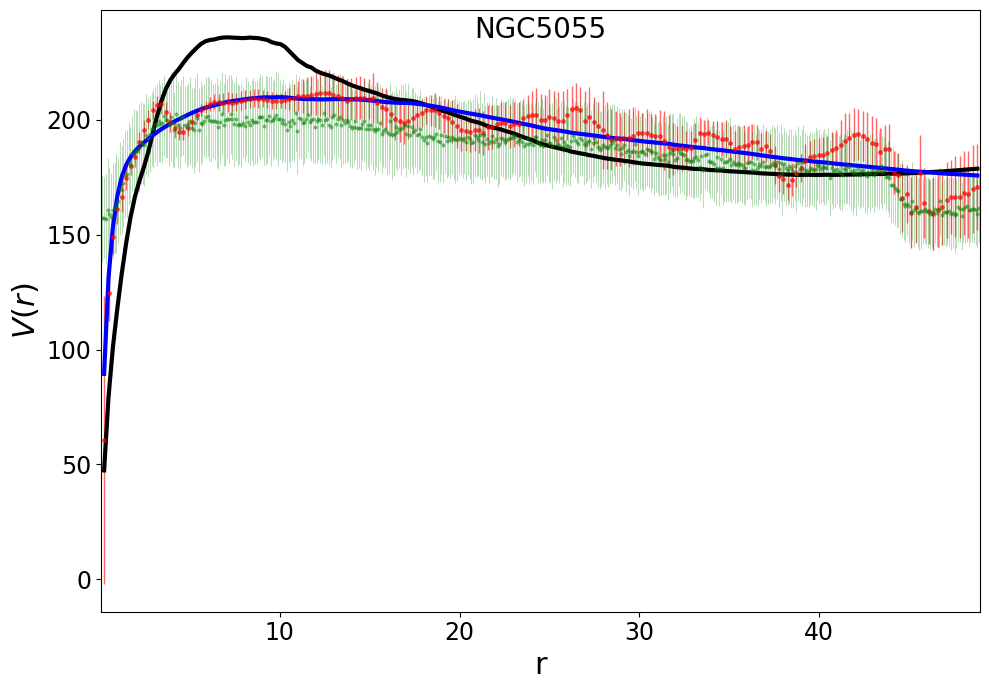

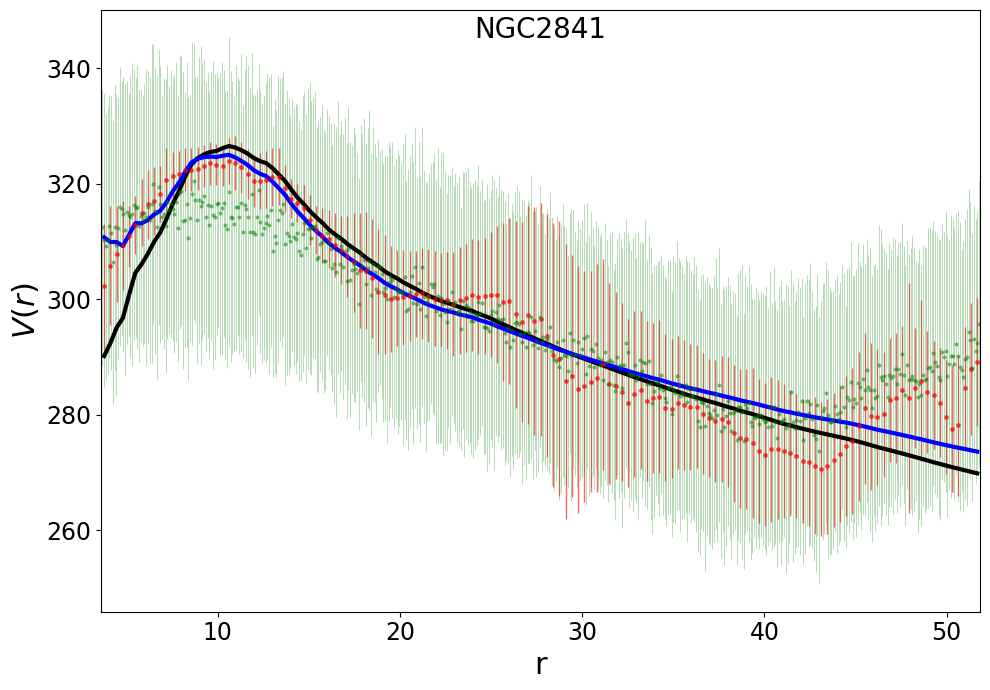

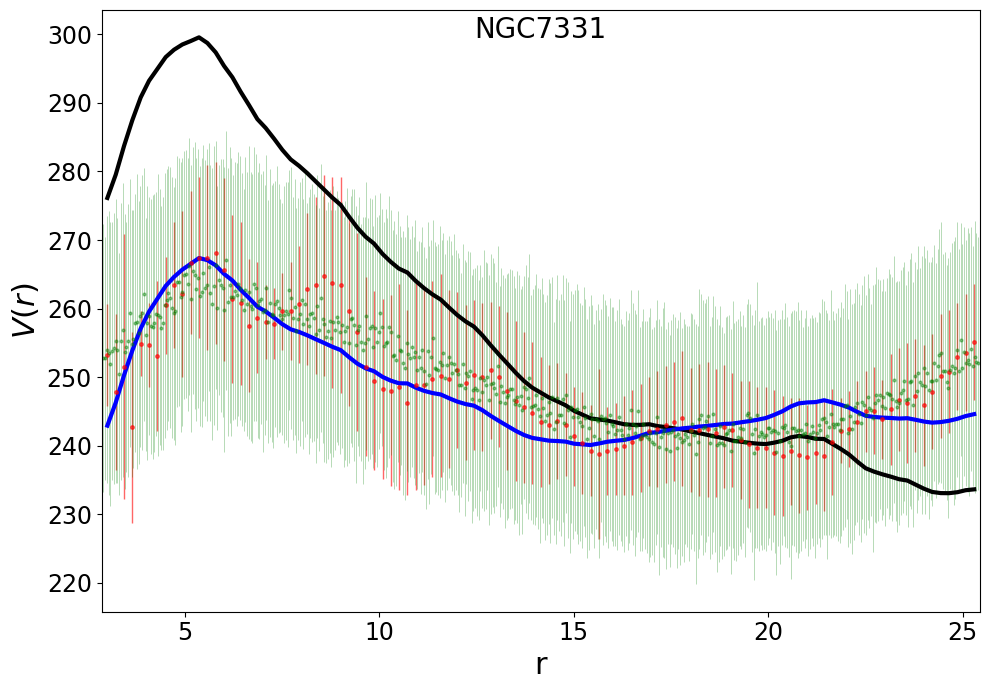

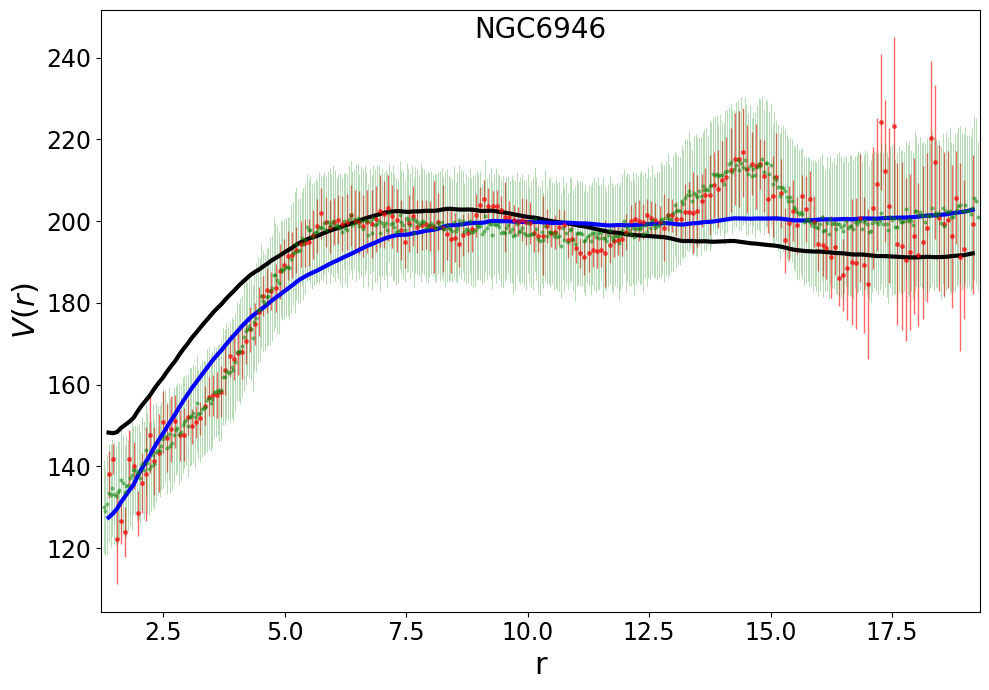

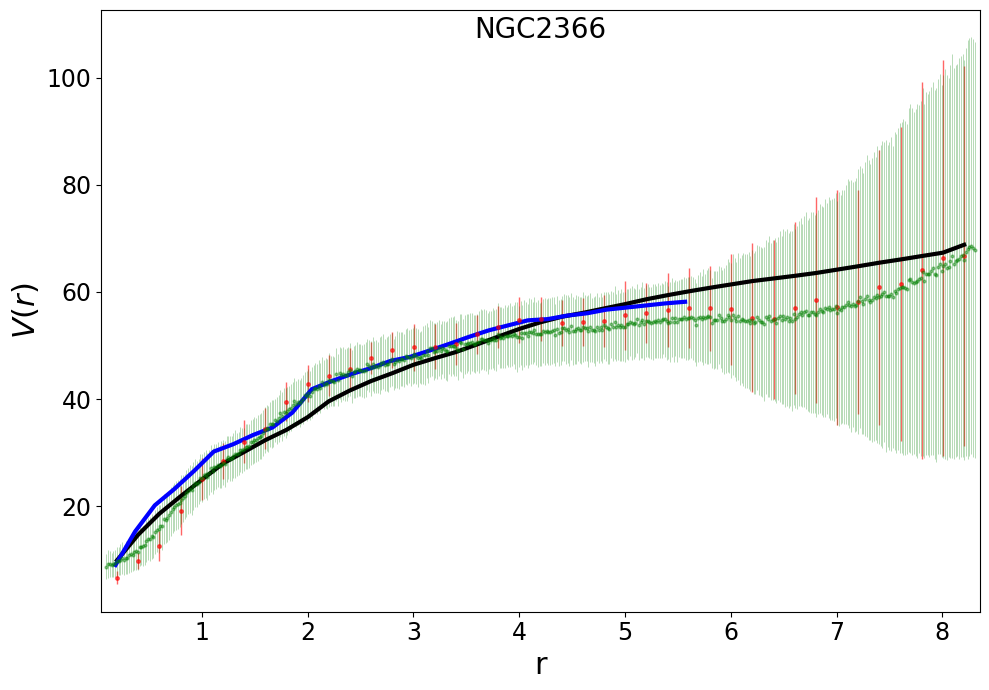

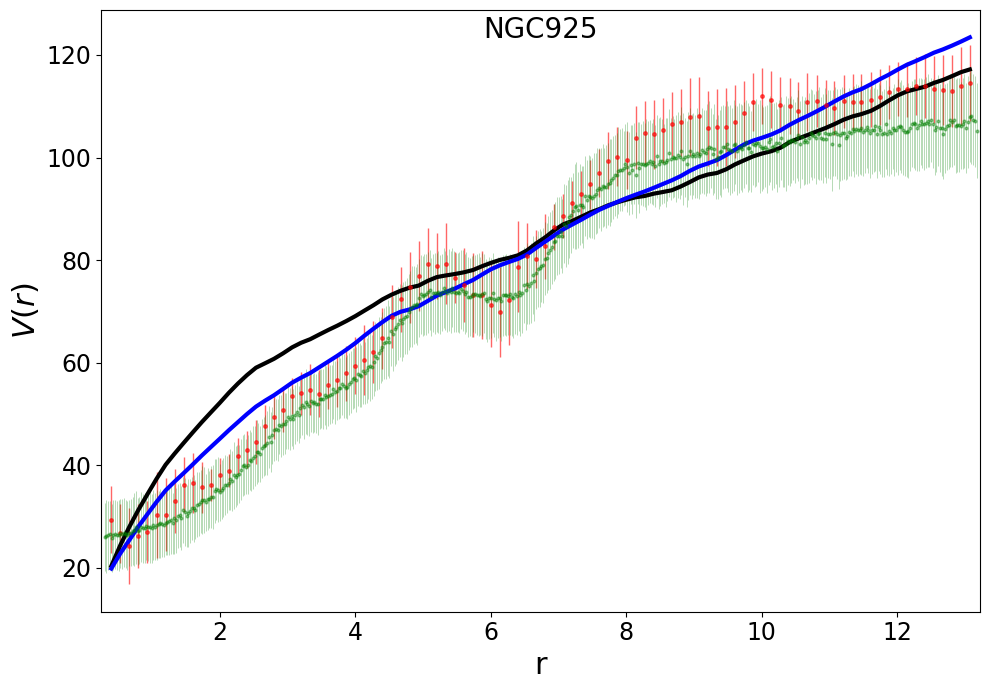

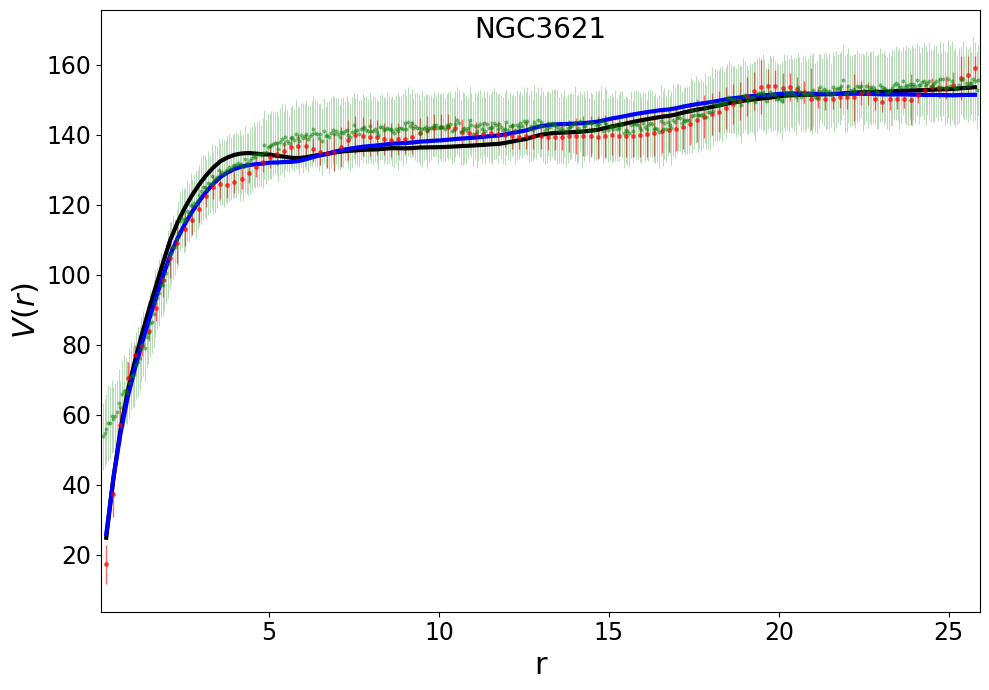

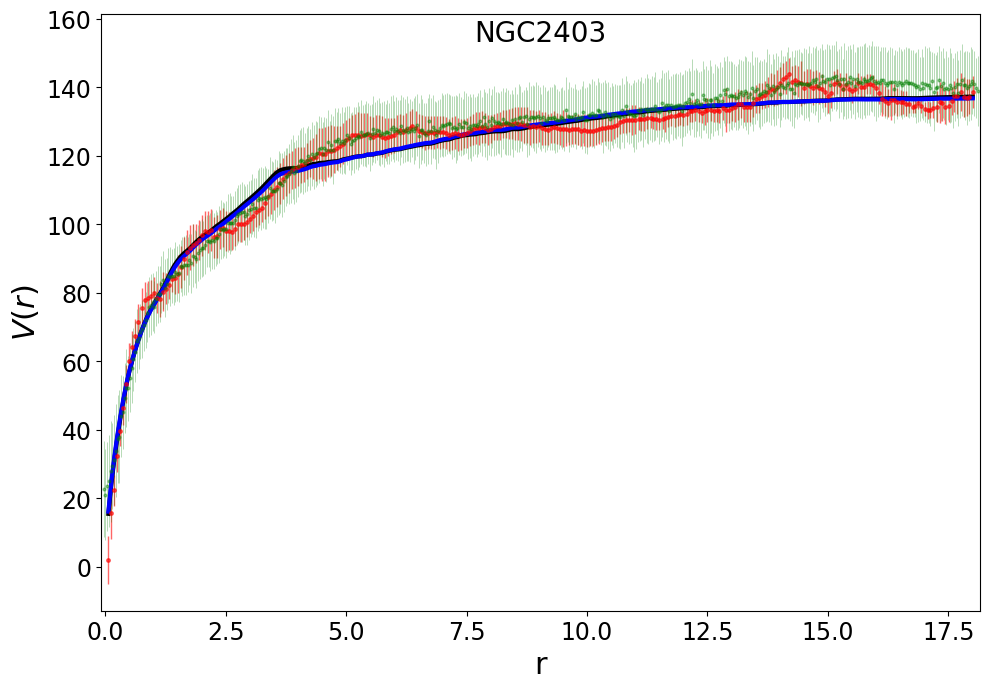

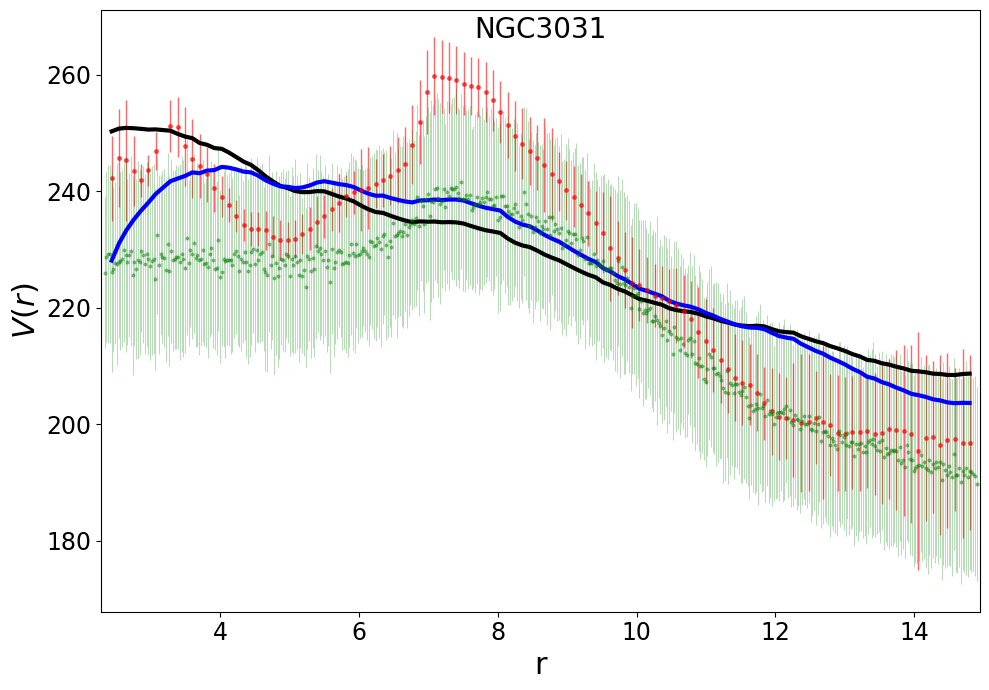

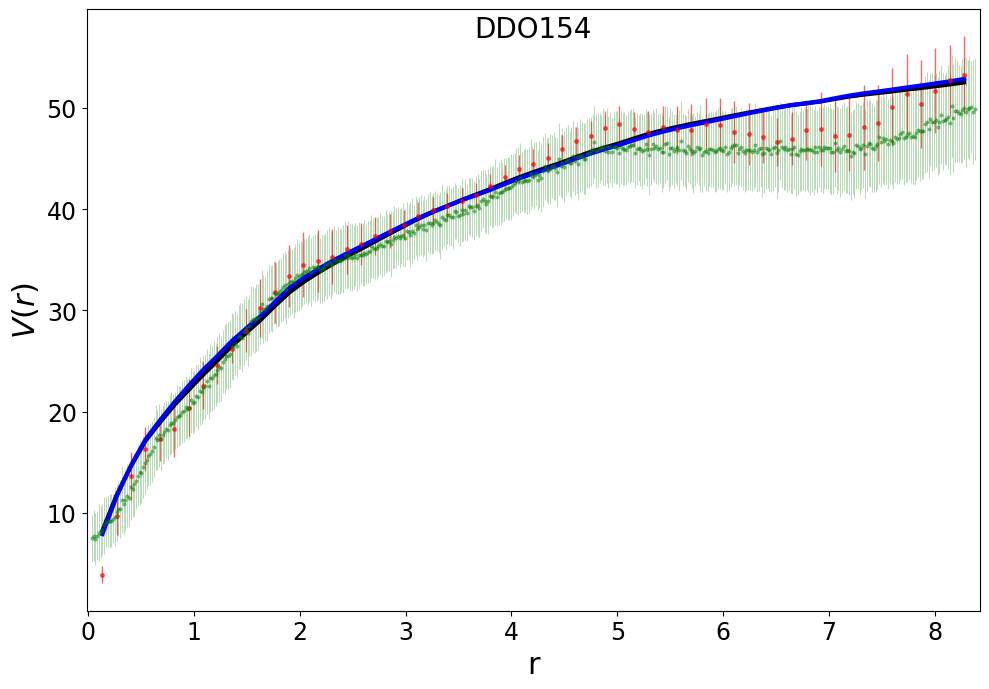

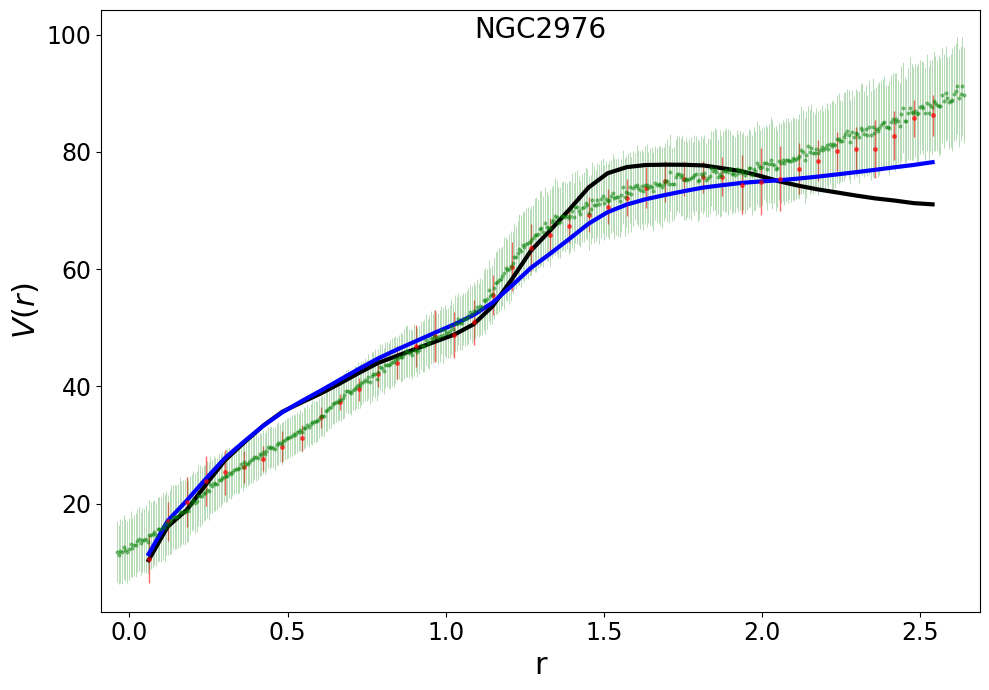

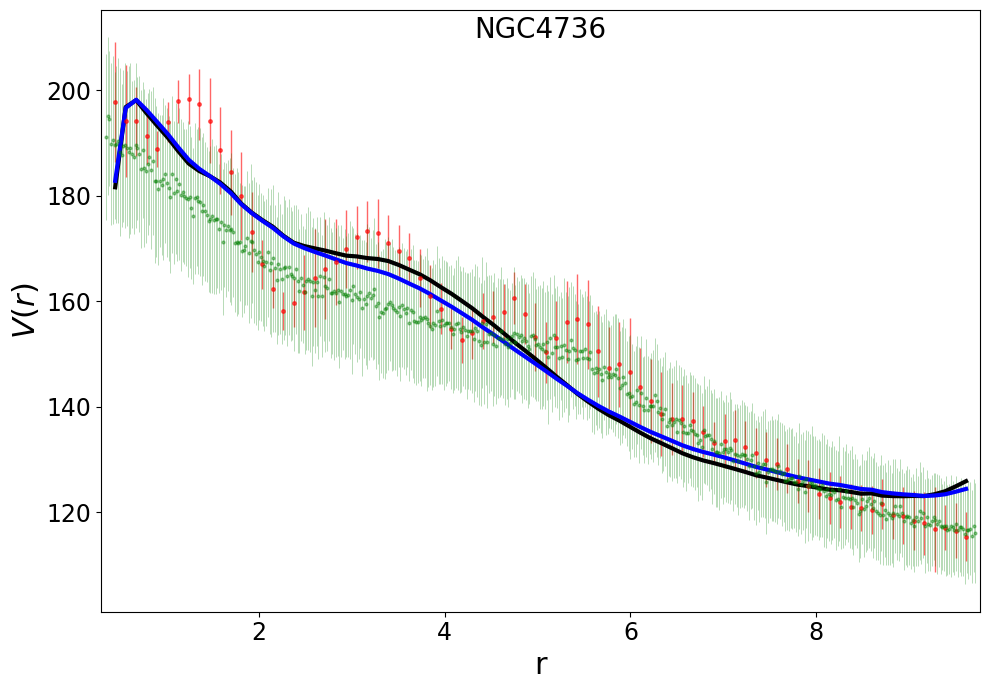

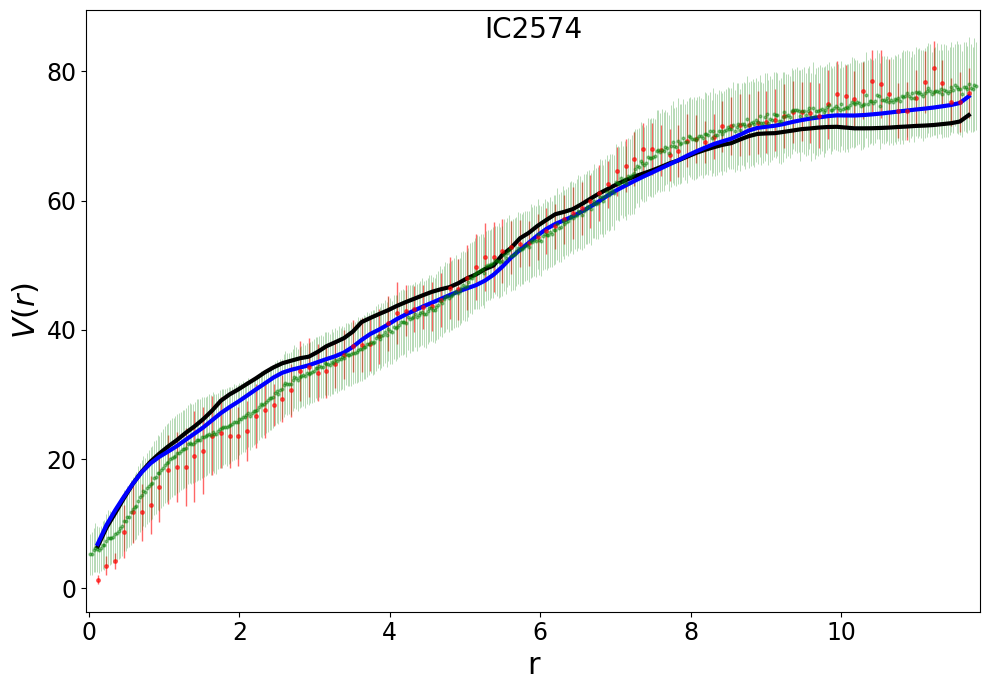

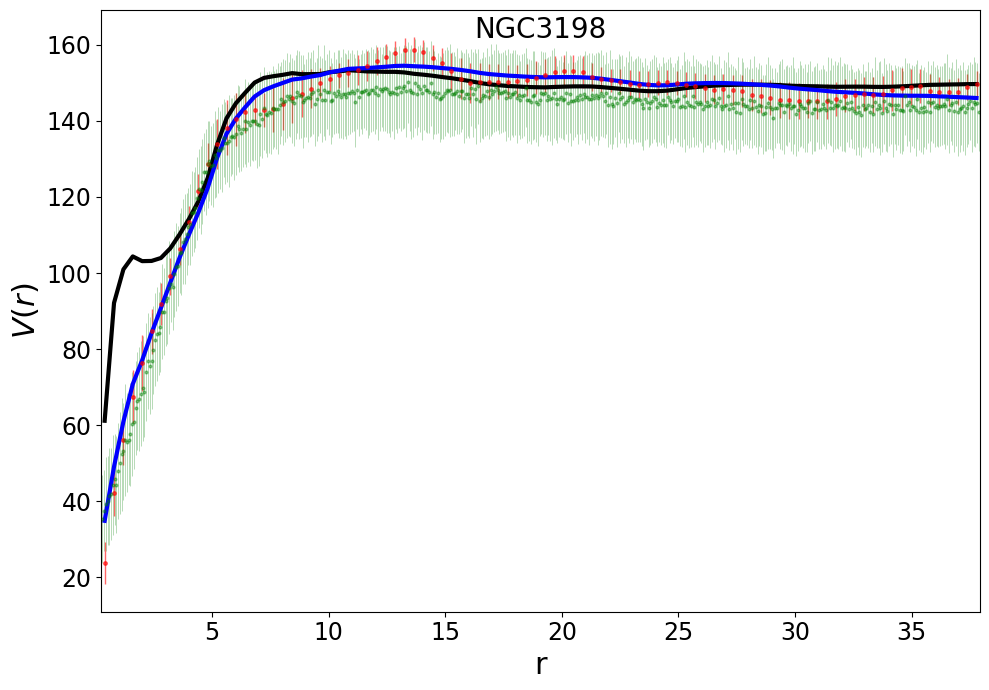

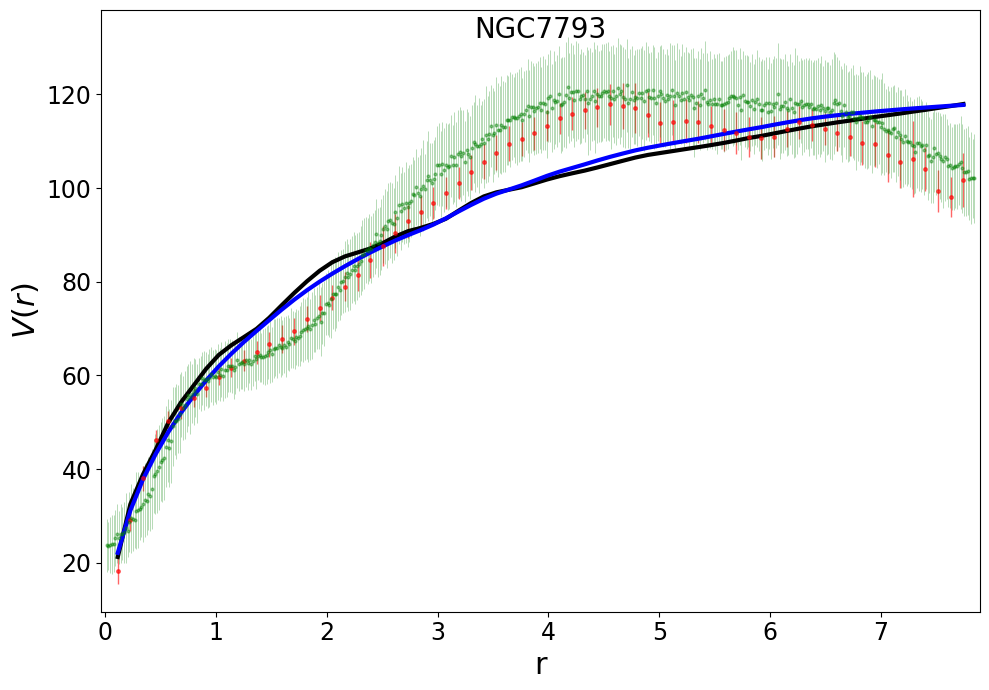

In [7]:
history_all = []
for idx, file in enumerate(files):
    print("Model {}/{}".format(idx+1, len(files)))
    print("-"*10)
    
    history_ind = {}
    
    data = np.loadtxt(files[idx], skiprows=12) 
    df = pd.DataFrame(data, columns=['Radius', 'vgas', 'vdisk', 'vbulge', 
                                     'vobs', 'err_vobs', 'Vu', 'Vt','Rxv', 'Vxy'])
    
    data_free = np.loadtxt(dir_name+root_name(files[idx])+".NFW.free.REV.dat", skiprows=12)
    df_free = pd.DataFrame(data_free, columns=['Radius', 'vgas', 'vdisk', 'vbulge', 
                                     'vobs', 'err_vobs', 'Vu', 'Vt','Rxv', 'Vxy'])
    N = len(df.values)
    df = df[['Radius', 'vobs','err_vobs', 'Vt']]


    randomize = np.random.permutation(N)
    data = df.values[randomize]

    z = data[:,0]
    y = data[:,1:3]
    
    scalerz = StandardScaler()
    scalerz.fit(z.reshape(-1,1))
    # apply transform
    z = scalerz.transform(z.reshape(-1,1))
    
    split = 0.8
    ntrain = int(split * len(z))
    indx = [ntrain]
    z_train, z_test = np.split(z, indx)
    y_train, y_test = np.split(y, indx)
    
    print("X_train shape: {} | y_train shape: {} | x_val shape: {} | y_val shape: {}".format(np.shape(z_train), 
                                                                                             np.shape(y_train), 
                                                                                             np.shape(z_test), 
                                                                                             np.shape(y_test)))

        
    model = tf.keras.models.load_model('models/RC_model_{}.h5'.format(idx+1), custom_objects={'MCDropout': MCDropout})


    # Generate test data
    test_batch_size = 500
    # x_test = np.random.uniform(0, 2., test_batch_size)
    x_test = np.linspace(min(df['Radius'].values)-0.1, max(df['Radius'].values)+0.1, test_batch_size)

    mc_dropout_num = 100  # Run Dropout 100 times
    predictions = np.zeros((mc_dropout_num, test_batch_size, 2))
    for i in range(mc_dropout_num):
        predictions[i] = model.predict(scalerz.transform(x_test.reshape(-1,1)))

    # get mean results and its varience
    prediction_mc_dropout = np.mean(predictions, axis=0)
    std_mc_dropout = np.std(predictions, axis=0)
    
    # plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    overlapping = 0.6
    # Plotting
    plt.figure(figsize=(10, 7), dpi=100)
    sigma = np.sqrt(std_mc_dropout[:, 0]**2 + std_mc_dropout[:, 1]**2+ prediction_mc_dropout[:,1]**2)

    plt.plot(df['Radius'].values, df['Vt'].values, color='black', linewidth=3, label='NFW $\\Upsilon_*^{fix}$',alpha=1)
    
    plt.plot(df_free['Radius'].values, df_free['Vt'].values, color='blue', linewidth=3, label='NFW $\\Upsilon_*^{free}$', alpha=1)

    plt.errorbar(df['Radius'].values, df['vobs'].values, yerr=df['err_vobs'].values, fmt='.', 
                 color='red', elinewidth=1, ecolor='red', markersize=5, label='Observations', alpha=overlapping)

    plt.errorbar(x_test, prediction_mc_dropout[:,0], yerr=sigma, markersize=2, fmt='o', 
                 ecolor='green', capthick=2, elinewidth=0.5, alpha=overlapping-0.2, c='green',
                 label='Neural reconstruction')


    plt.ylabel("$V(r)$", fontsize=22)
    plt.xlabel("r", fontsize=22)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    
    plt.title(root_name(files[idx]), y=0.94, fontsize=20)

    if idx == 0:
        leg = plt.legend(fontsize=18, loc='upper right', framealpha=0)
#         leg = plt.legend()
        for lh in leg.legendHandles: 
            lh.set_alpha(1)

    plt.xlim(min(df['Radius'].values)-0.15, max(df['Radius'].values)+0.15)
    plt.tight_layout()
        
    plt.savefig("figures/load_neural_reconstruction_RC_{}.png".format(idx+1), dpi=100)
          
    print("-"*10)
